<a href="https://colab.research.google.com/github/Rediet2000/CreditScoringModel-/blob/task1/Week_6_for_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# add data
dataset = pd.read_csv('../data/data.csv')
print(dataset.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [ ]:
# Overview of the data
# number of rows and columns
print(dataset.shape)
# Data type
print(dataset.dtypes)

(95662, 16)
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [ ]:
# Summary Statistics
print(dataset.describe())

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


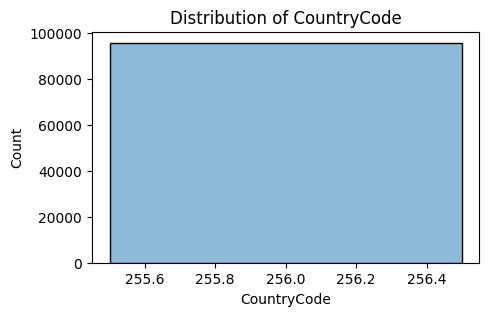

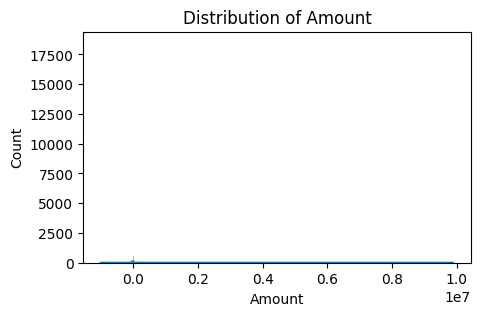

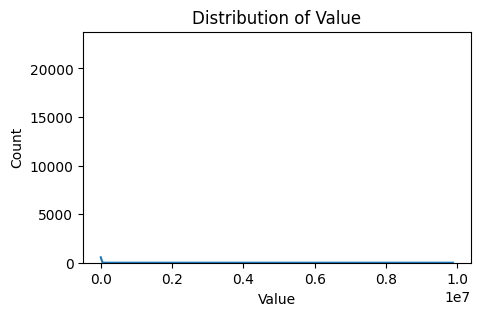

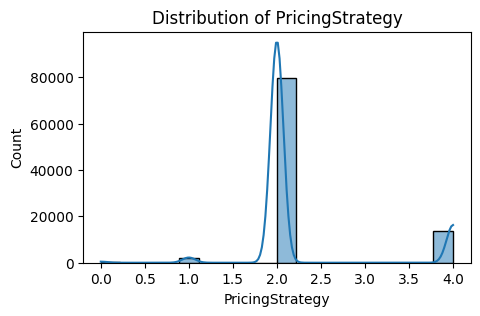

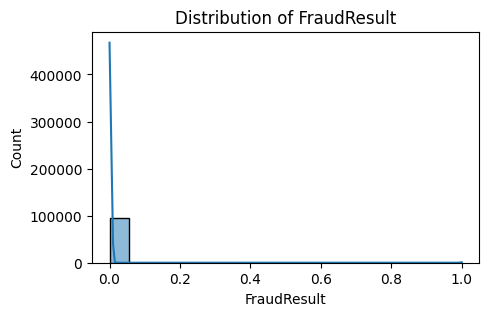

In [ ]:
# Distribution of Numerical Features
import seaborn as sns
# Visualize distribution of numerical features
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
# Distribution of Categorical Features
categorical_cols = dataset.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=dataset[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

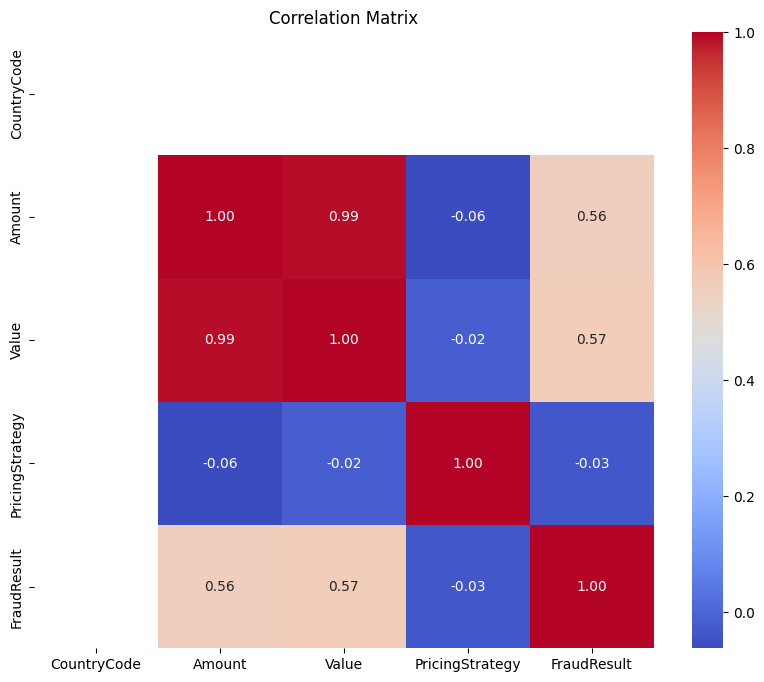

In [ ]:
# Correlation Analysis
correlation_matrix = dataset[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


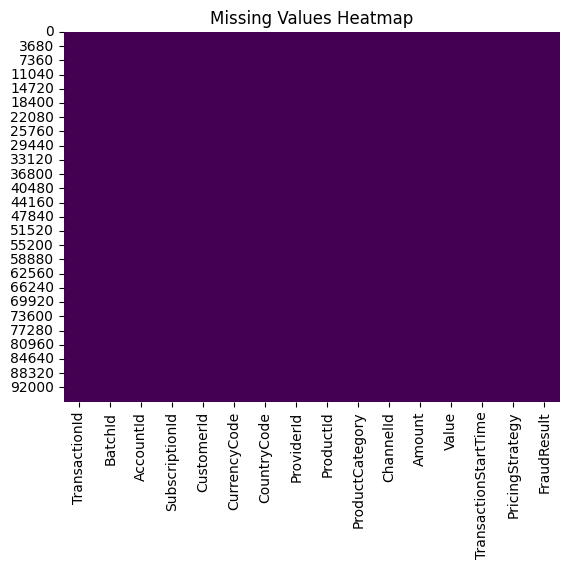

In [ ]:
# Check for missing values
print(dataset.isnull().sum())
# Visualize missing values
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

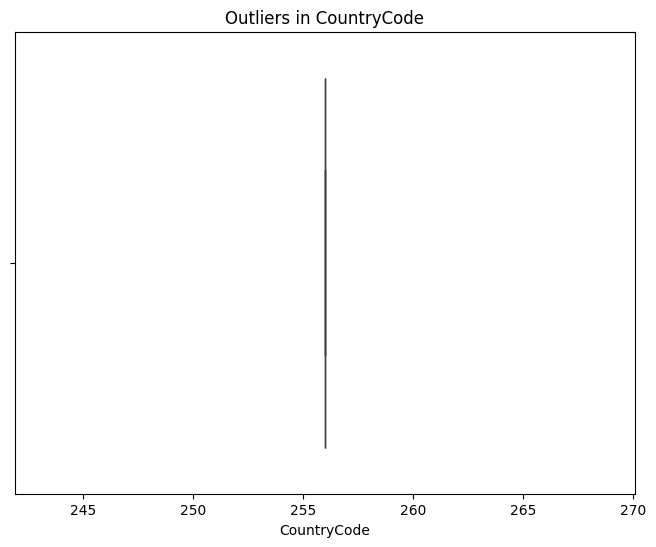

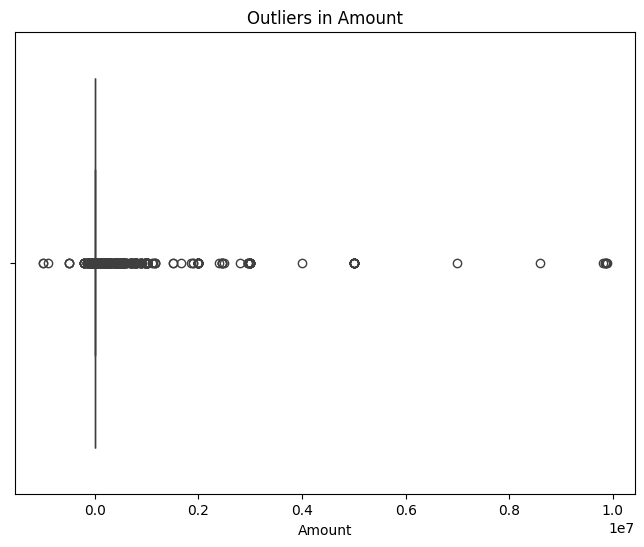

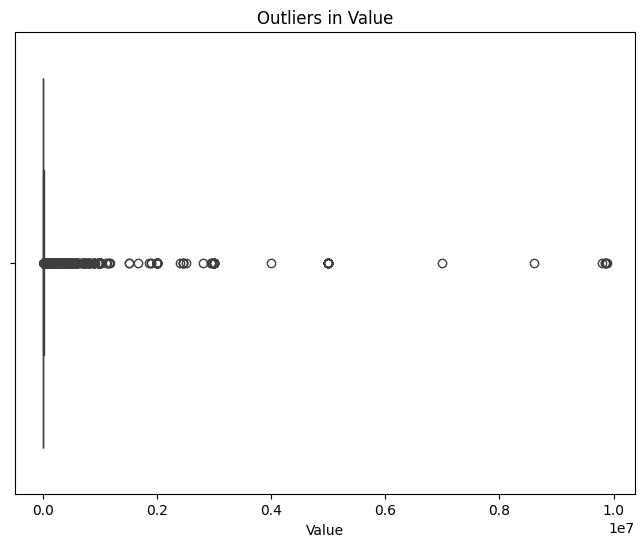

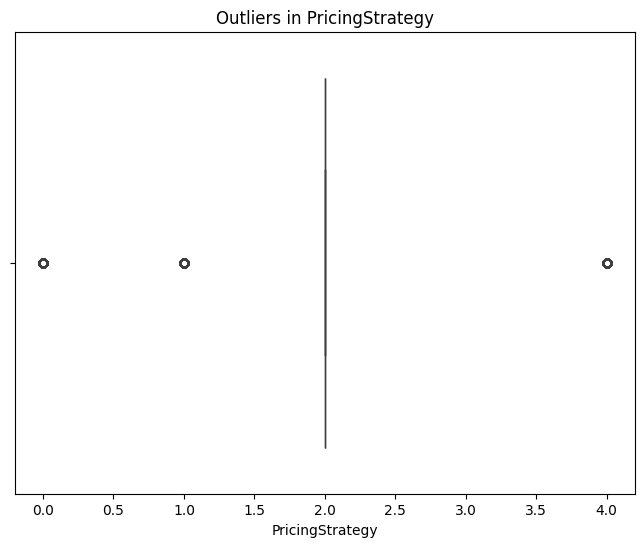

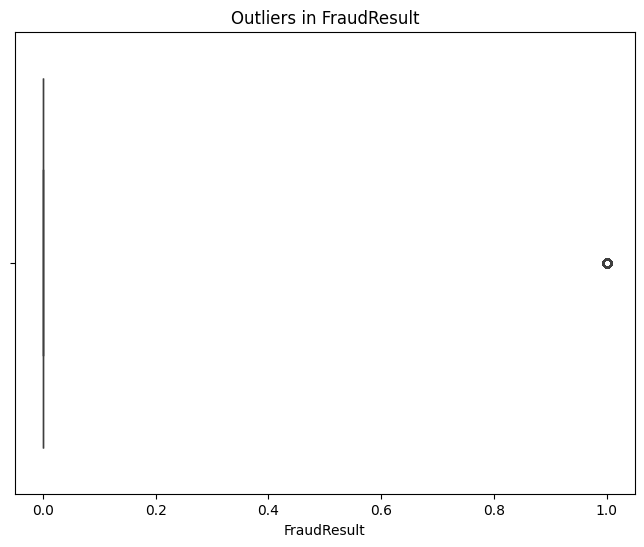

In [ ]:
# Outlier Detection
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dataset[col])
    plt.title(f'Outliers in {col}')
    plt.show()

Task 3 - Feature Engineering

In [ ]:
# Create Aggregate Features
# Total transaction amount per customer
dataset['total_transaction_amount'] = dataset.groupby('CustomerId')['Amount'].transform('sum')

# Average transaction amount per customer
dataset['avg_transaction_amount'] = dataset.groupby('CustomerId')['Amount'].transform('mean')

# Transaction count per customer
dataset['transaction_count'] = dataset.groupby('CustomerId')['TransactionId'].transform('count')

# Standard deviation of transaction amounts per customer
dataset['std_transaction_amount'] = dataset.groupby('CustomerId')['Amount'].transform('std')

In [ ]:
# Extract Features
dataset['TransactionStartTime'] = pd.to_datetime(dataset['TransactionStartTime'])

# Extract transaction hour, day, month, and year
dataset['transaction_hour'] = dataset['TransactionStartTime'].dt.hour
dataset['transaction_day'] = dataset['TransactionStartTime'].dt.day
dataset['transaction_month'] = dataset['TransactionStartTime'].dt.month
dataset['transaction_year'] = dataset['TransactionStartTime'].dt.year

In [ ]:
# Encode Categorical Variablesfrom sklearn.preprocessing import LabelEncoder
# Label Encoding for 'ProviderId'
import pandas as pd
from sklearn.preprocessing import LabelEncoder
dataset = {
    'TransactionId': ['TransactionId_76871', 'TransactionId_73770', 'TransactionId_26203', 'TransactionId_380', 'TransactionId_28195'],
    'BatchId': ['BatchId_36123', 'BatchId_15642', 'BatchId_53941', 'BatchId_102363', 'BatchId_38780'],
    'AccountId': ['AccountId_3957', 'AccountId_4841', 'AccountId_4229', 'AccountId_648', 'AccountId_4841'],
    'SubscriptionId': ['SubscriptionId_887', 'SubscriptionId_3829', 'SubscriptionId_222', 'SubscriptionId_2185', 'SubscriptionId_3829'],
    'CustomerId': ['CustomerId_4406', 'CustomerId_4406', 'CustomerId_4683', 'CustomerId_988', 'CustomerId_988'],
    'CurrencyCode': ['UGX', 'UGX', 'UGX', 'UGX', 'UGX'],
    'CountryCode': [256, 256, 256, 256, 256],
    'ProviderId': ['ProviderId_6', 'ProviderId_4', 'ProviderId_6', 'ProviderId_1', 'ProviderId_4'],
    'ProductId': ['ProductId_10', 'ProductId_6', 'ProductId_1', 'ProductId_21', 'ProductId_6'],
    'ProductCategory': ['airtime', 'financial_services', 'airtime', 'utility_bill', 'financial_services'],
    'ChannelId': ['ChannelId_3', 'ChannelId_2', 'ChannelId_3', 'ChannelId_3', 'ChannelId_2'],
    'FraudResult': ['No', 'Yes', 'No', 'Yes', 'No']
}

# Create DataFrame
dataset = pd.DataFrame(dataset)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = [
    'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
    'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'FraudResult'
]

# Apply Label Encoding to each categorical column
for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# Print the encoded DataFrame
print(dataset)


   TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  \
0              4        2          0               3           0   
1              3        1          2               2           0   
2              0        4          1               1           1   
3              2        0          3               0           2   
4              1        3          2               2           2   

   CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  \
0             0            0           2          1                0   
1             0            0           1          3                1   
2             0            0           2          0                0   
3             0            0           0          2                2   
4             0            0           1          3                1   

   ChannelId  FraudResult  
0          1            0  
1          0            1  
2          1            0  
3          1            1  
4          0      

In [ ]:
# Handle Missing Values
# Drop rows with missing values (if acceptable)
dataset = dataset.dropna()

In [ ]:
# Normalize Numerical Features
from sklearn.preprocessing import StandardScaler
# check CountryCode
if 'CountryCode' not in dataset.columns:
    # If not, print a warning or handle it appropriately
    # For example, you could raise an exception or skip normalization for this column
    print(f"Warning: 'CountryCode' not found in dataset columns. Skipping normalization for this column.")
else:
    # If 'CountryCode' is in the columns, and it's not in numerical_cols, add it
    if 'CountryCode' not in numerical_cols:
        numerical_cols = numerical_cols.append(pd.Index(['CountryCode']))

    # Proceed with normalization for columns present in both numerical_cols and dataset columns
    cols_to_normalize = list(set(numerical_cols) & set(dataset.columns))
    sc = StandardScaler()
    dataset[cols_to_normalize] = sc.fit_transform(dataset[cols_to_normalize])

In [ ]:
# Feature Engineering using Weight of Evidence (WOE) and Information Value (IV)
from xverse.transformer import WOE
from category_encoders import WOEEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
X = dataset.drop(columns=['FraudResult'])
y = dataset['FraudResult']

woe_encoder = WOEEncoder()
dataset_encoded = woe_encoder.fit_transform(X, y)

In [ ]:
#